<a href="https://colab.research.google.com/github/javierflorez-aiml/Introduction-to-Natural-Language-Processing/blob/main/Project%201%20-%20Python%20-%20FoddHub%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/01 Texas Program/01 Python Fundamentals/Project Final Case/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: The data has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are attributes of different types
1. 5 numerical columns: Order_id, customer_id, food_preparation_time, delivery time and cost_of_the_order which is float
2. 4 object columns: restaurant_name, cuisine_type, day_of_the_week and rating, are objects
3. rating is read as a object type column but it should be a numerical column


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Let's study suspicious variables to make a sanitary check
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

#### Observations: No missing data in cuisine type column

In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

#### Observations: No missing data in day_of_the_week column

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations: The string "Not given" is found within the data in this column. Given that this column should contain numerical values, it is necessary to address this variable.


In [ ]:
# Replace values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)
print(df.dtypes)


order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [ ]:
# and change the data type to float
df['rating'] = df['rating'].astype(float)

In [ ]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
* Now we see that rating column is a numerical column.
* There are missing values on rating column
* Let's check the missing values in the data

In [ ]:
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

* There are 736 missing values in rating column

* The rating column should only contain values ranging from 1 to 5 stars, and therefore, outlier values are not expected. There are two options to address the missing values:
1. Leave the data base with missing values considering the quantity of missing values or,
2. use the mean as an appropriate method for replacement
In this case, it was decided to use the mean as an appropriate method for replacement for practice and academic purposes.

In [ ]:
# extracting all the information of other variable where rating is null
df.loc[df['rating'].isnull()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


* There is not a pattern or relation beteween null values in rating and other variables

In [ ]:
# Let's check the nun values in column rating for the restaurants
df.loc[df['rating'].isnull()==True,'restaurant_name'].value_counts(dropna=False)

Shake Shack                    86
The Meatball Shop              48
Blue Ribbon Sushi              46
Blue Ribbon Fried Chicken      32
Parm                           29
                               ..
The Loop                        1
Schnipper's Quality Kitchen     1
Go! Go! Curry!                  1
Market Table                    1
Amy Ruth's                      1
Name: restaurant_name, Length: 134, dtype: int64

In [ ]:
# Let's check the nun values in column rating for the type of cuisine
df.loc[df['rating'].isnull()==True,'cuisine_type'].value_counts(dropna=False)

American          216
Japanese          197
Italian           126
Chinese            82
Mexican            29
Indian             23
Middle Eastern     15
Mediterranean      14
Thai               10
French              8
Spanish             6
Korean              4
Southern            4
Vietnamese          2
Name: cuisine_type, dtype: int64

* Seems that a proper approach to treat the missing values of this column would be group the data on the basis of cuisine type and restaurant

In [ ]:
# checking the average number rating in a type of cuisine
df.groupby(['cuisine_type','restaurant_name'])[['rating']].mean()

rating
cuisine_type restaurant_name                     
American     'wichcraft                  5.000000
             5 Napkin Burger             4.000000
             67 Burger                   5.000000
             Alidoro                          NaN
             Bareburger                  4.058824
...                                           ...
Thai         Song Thai Restaurant & Bar  5.000000
             Spice Thai                       NaN
Vietnamese   Nha Trang One               3.000000
             V-Nam Cafe                  4.000000
             Xe May Sandwich Shop        5.000000

[179 rows x 1 columns]

* Seems that some restaurants have not been rated. So treating missing values on this column would be by grouping the data on cuisine type only

In [ ]:
# checking the average number rating in a type of cuisine
df.groupby(['cuisine_type'])[['rating']].mean()

,rating
cuisine_type,
American,4.298913
Chinese,4.338346
French,4.300000
Indian,4.540000
Italian,4.360465
Japanese,4.373626
Korean,4.111111
Mediterranean,4.218750
Mexican,4.416667


In [ ]:
# imputing missing values in rating column
df['rating'] = df['rating'].fillna(value = df.groupby(['cuisine_type'])['rating'].transform('mean'))

In [ ]:
# checking if all the missing values were imputed in rating column
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage


* Missing values have been imputed
* Let's convert all the values of rating to integer type

In [ ]:
df['rating'] = df['rating'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


#### Observations:
* Missing values in the rating column have been handled by imputing the mean since outliers are not anticipated in this context.
* The treatment for missing values involved grouping the rating column by cuisine type.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,4.210748e+00,0.603845,3.00,4.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* `food_preparation_time:` On average, food preparation takes approximately 27 minutes, with a minimum time of 20 minutes and a maximum time of 35 minutes.


#### Observations:
* This question was addreses before, see replies to question 3.
* Before missing values treatment there was 736 orders not rated.
* The missing values have been treated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Let's check the distribution for numerical columns.**

**Observations on cost_of_the_order**

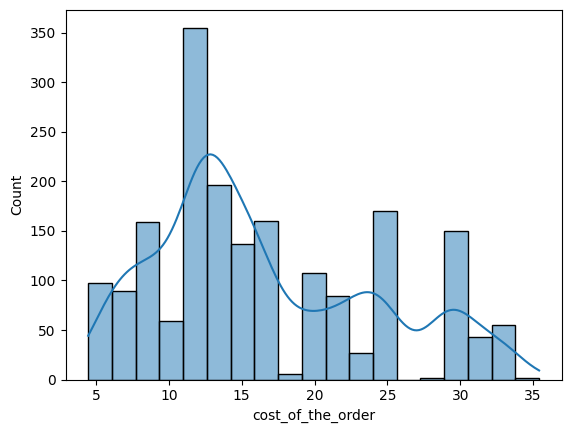

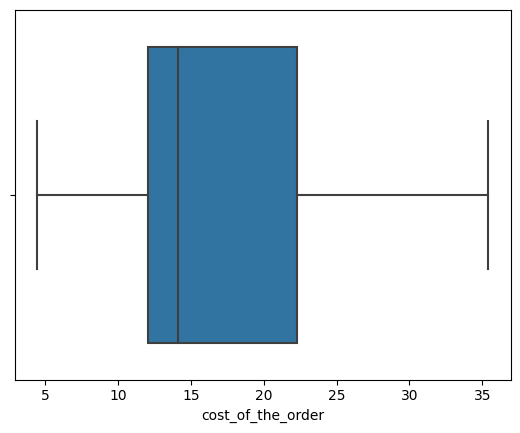

In [ ]:
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

In [ ]:
# importing plotly
import plotly.express as px

In [ ]:
fig = px.box(df, x="cost_of_the_order")
fig.show()

* The distribution is skewed towards right.
* No outliers are present in this column.
* The average order cost is 14.14 USD.
* The Q25 is 12.1 USD, and the Q75 is 22.3 USD.

**Observations on rating**

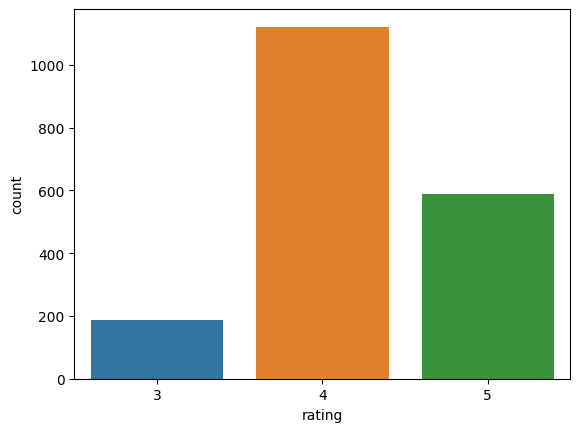

In [ ]:
sns.countplot(data=df,x='rating')
plt.show()

* The values on this column are discrete in nature.
* The majority of orders, over 1000 in number, have received a 4-star rating.
* Approximately 600 orders have received a 5-star rating.
* About 200 orders have been rated with 3 stars.
* The distribution of this graph has been altered as a result of imputing missing values in the rating column. However, it appears that the relationships with other columns have not been significantly impacted.

**Observations on food_preparation_time**

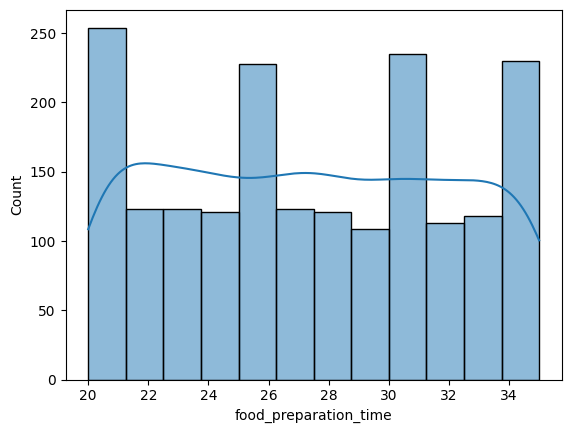

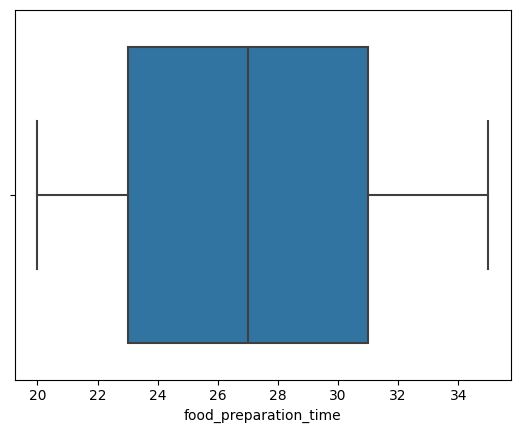

In [ ]:
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

In [ ]:
fig = px.box(df, x="food_preparation_time")
fig.show()

* The distribution is symetric.
* No outliers are present in this column.
* The average food preparation time is 27 min.
* The Q25 is 23 min, and the Q75 is 31 min.

**Observations on delivery_time**

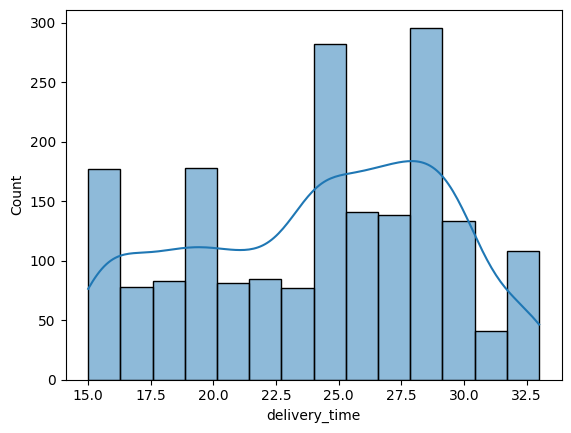

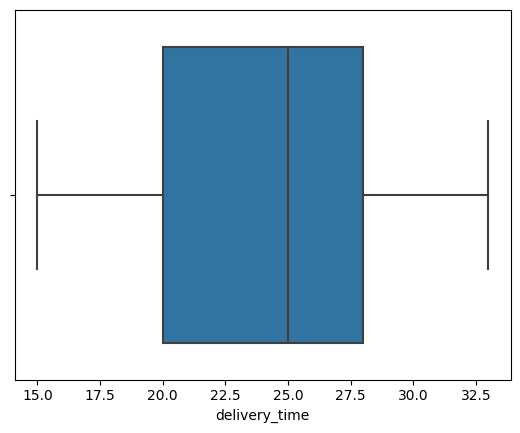

In [ ]:
sns.histplot(data=df,x='delivery_time',kde=True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

In [ ]:
fig = px.box(df, x="delivery_time")
fig.show()

* The distribution is skewed towards left.
* No outliers are present in this column.
* The average delivery time is 25 min.
* The Q25 is 20 min, and the Q75 is 28 min.

**Let's check the distribution for categorical columns.**

**Observations on order_id**

In [ ]:
df['order_id'].nunique()

1898

* Unique values = to database rows. There are not repeated values

**Observations on customer_id**

In [ ]:
df['customer_id'].nunique()

1200

* There are 1200 customers in the database

**Observations on restaurant_name**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 142 (\x8e) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



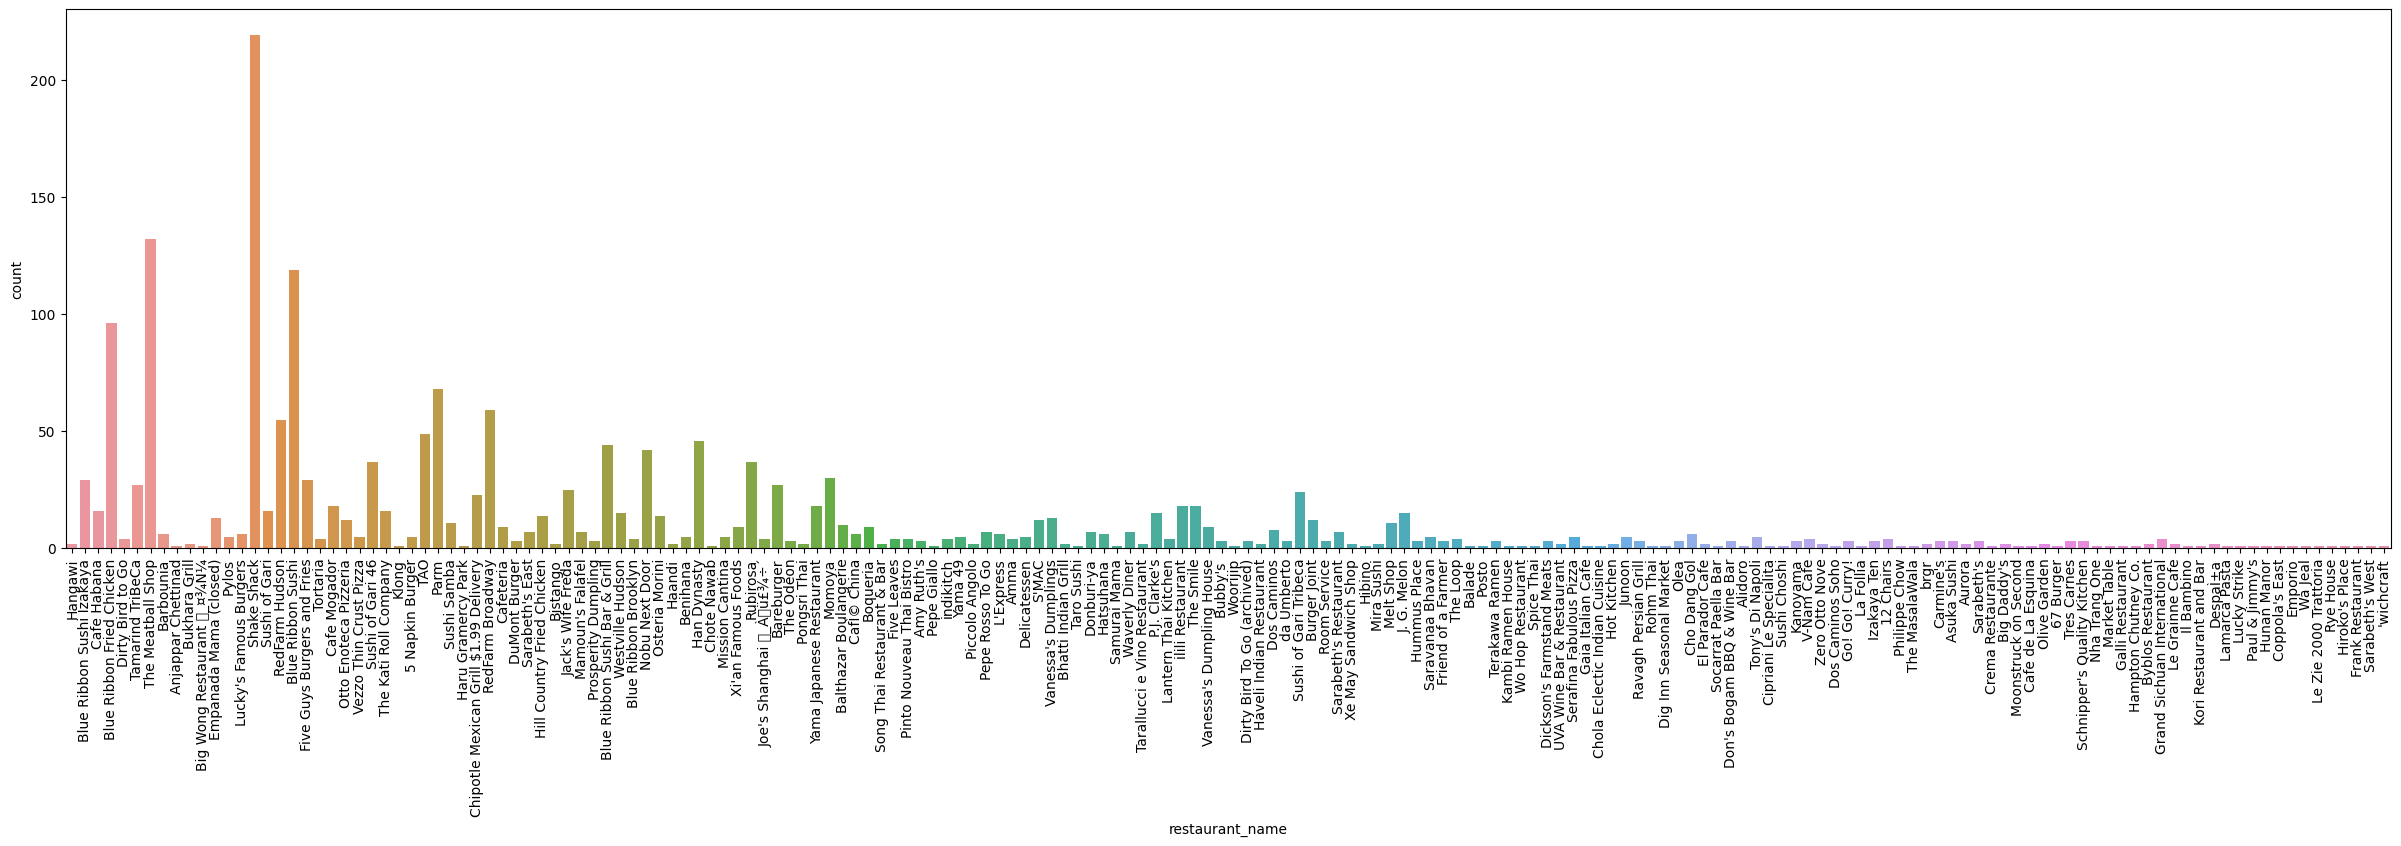

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(data=df,x='restaurant_name');
plt.xticks(rotation=90)

In [ ]:
df['restaurant_name'].nunique()

178

* There are 178 restaurants registered in the database
* The top 1 retaurant is Shake Shack with more that 200 orders
* The top 2 restaurant is The Meatball Shop with more than 100 orders
* The top 3 restaurant is Blue Ribbon Sushi
* The top 4 restaurant is Blue Ribbon Fried Chicken

**Observations on cuisine_type**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

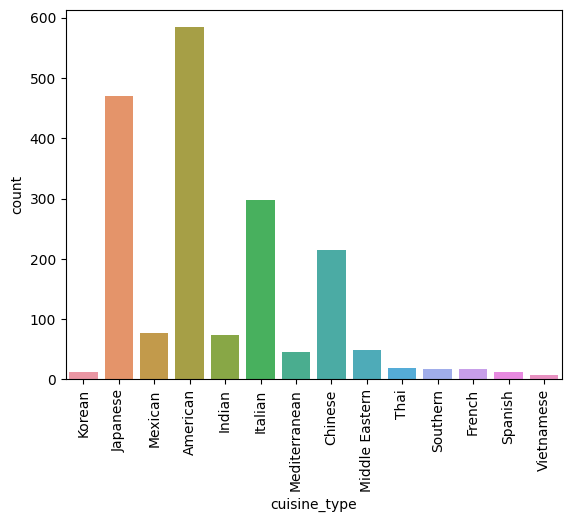

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)

* 14 types of cuisine are registerd in the database
* The prefered type of cuisine is American with more than 500 orders
* The top 2 cuisine is Japanese with more than 400 orders
* The top 3 cuisine is Italian
* The top 4 cuisine is Chinese

**Observations on day of the week**

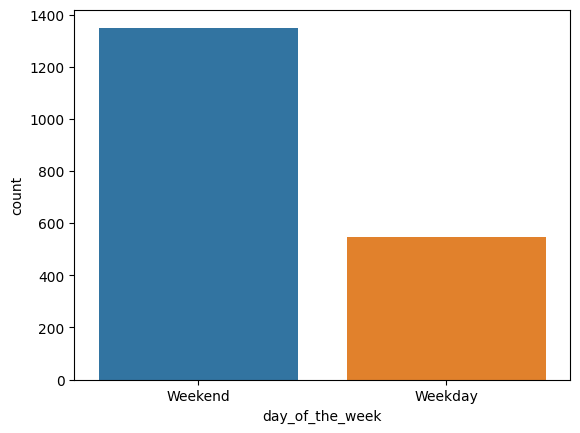

In [ ]:
sns.countplot(data=df,x='day_of_the_week');

* Most or the orders are placed on the weekends


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
* Shake Shack is the top restaurant with 219 orders.
* The Meatball Shop secures the second position with 132 orders.
* Blue Ribbon Sushi follows closely as the third top restaurant with 119 orders.
* Blue Ribbon Fried Chicken ranks fourth with 96 orders.
* Parm rounds out the top five restaurants with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<ipython-input-397-b65bfff55835>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



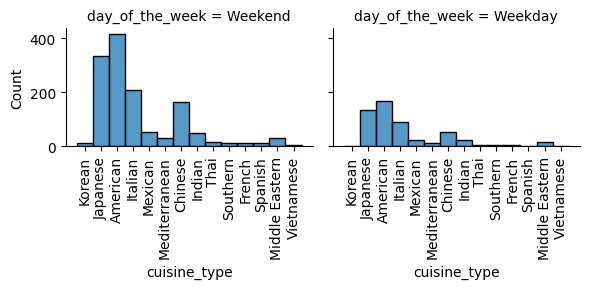

In [ ]:
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "cuisine_type")
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()


#### Observations:
* The most popular cuisine on weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df.loc[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations:
* The percentage of orders that cost more than 20 dollars is 29.2%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* The mean order delivery time is 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations: The top 3 most frequent customers IDs are:
1. Customer ID 52832 with 13 orders
2. Customer ID 47440 with 10 orders
3. Customer ID 83287 with 9 orders


### **Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Observations on correlation between columns**

<ipython-input-401-b547eaa8dce0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



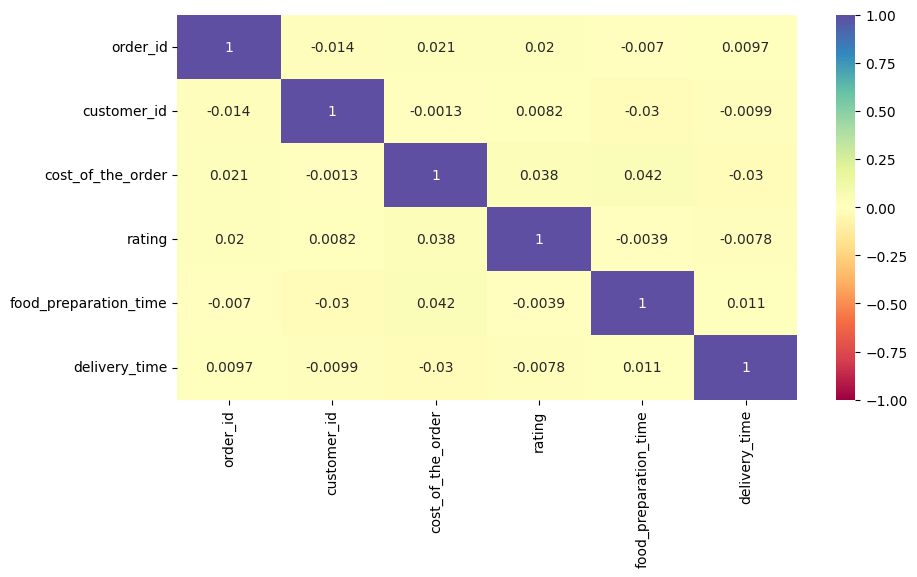

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* There are no patterns. Let's correlate only numerical columns

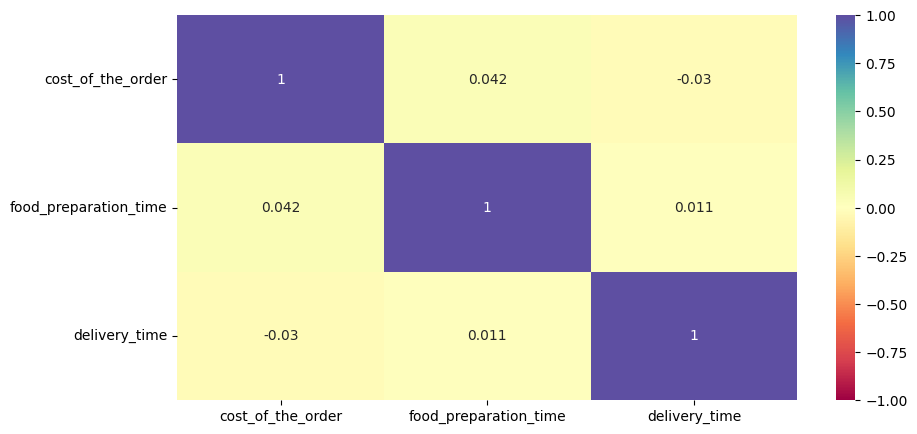

In [ ]:
num_cols= ['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

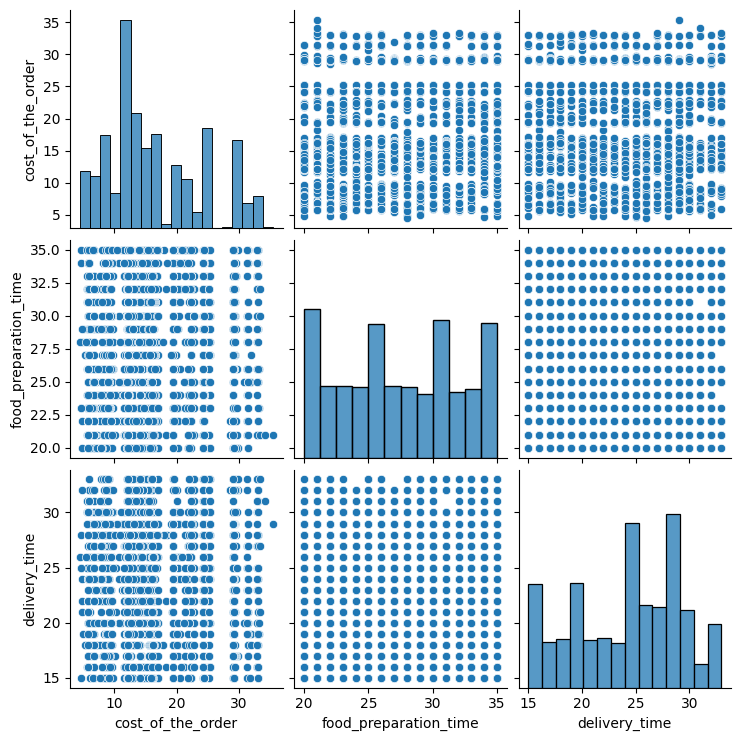

In [ ]:
sns.pairplot(data=df[['cost_of_the_order','food_preparation_time','delivery_time']])

* The numerial columns are no correlated each other.

**Bivariate Analysis**

Observation on cost_of_the_order vs delivery time

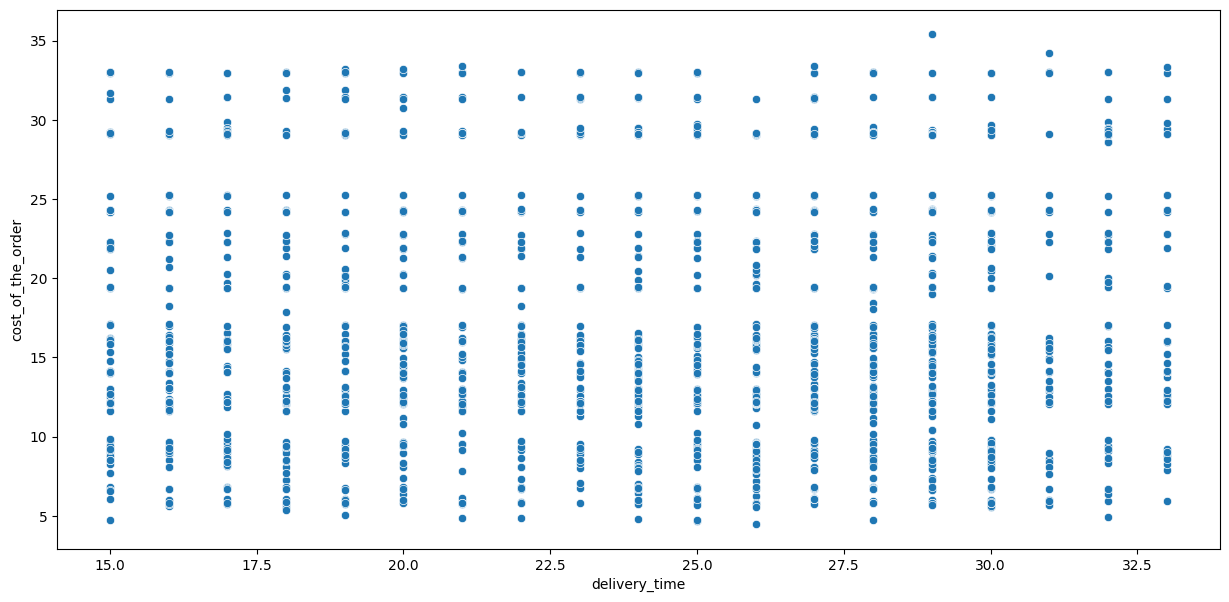

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='delivery_time', y ='cost_of_the_order')
plt.show()

* No correlation found

Observation on cost_of_the_order vs cuisine

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

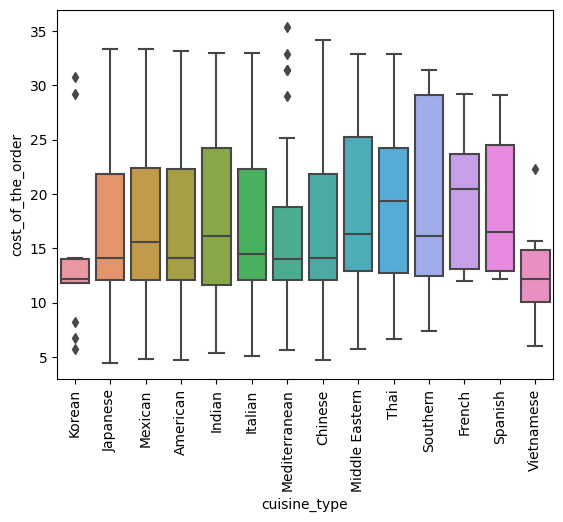

In [ ]:
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)


* Korean, Vietnamese, and Mediterranean cousine have outliers
* French cousine has the higher mean
* Vietnemese cousine has the lower mean

Observation on delivery time vs cuisine

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

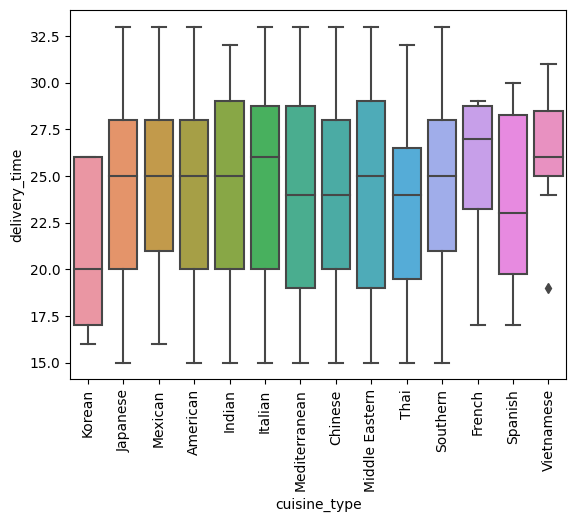

In [ ]:
sns.boxplot(data=df,x='cuisine_type',y='delivery_time')
plt.xticks(rotation=90)

* French cuisine has the higher delivery time mean  
* Korean cuisine has the lower delivery time mean

Observation on food preparation time vs cuisine type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

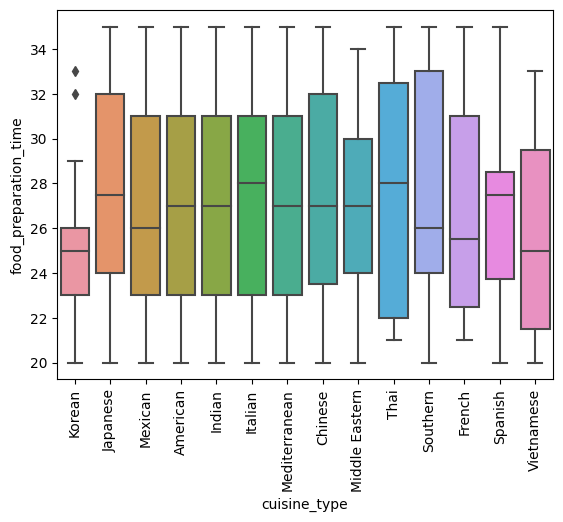

In [ ]:
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)

* Italian and Thai cuisine have the higher food preparation time mean
* Vietnamese and Korean cuisine have the lower food preparation time mean

Observation on rating vs cuisine

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

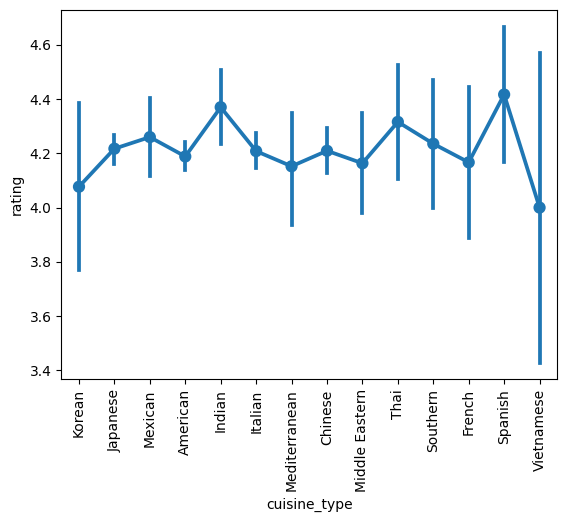

In [ ]:
sns.pointplot(data=df,x='cuisine_type',y='rating')
plt.xticks(rotation=90)

* Indian and Spanish food are the best rated
* Vietnamese and Korean food are the lowest rated

Observation on rating vs restaurant

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 142 (\x8e) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



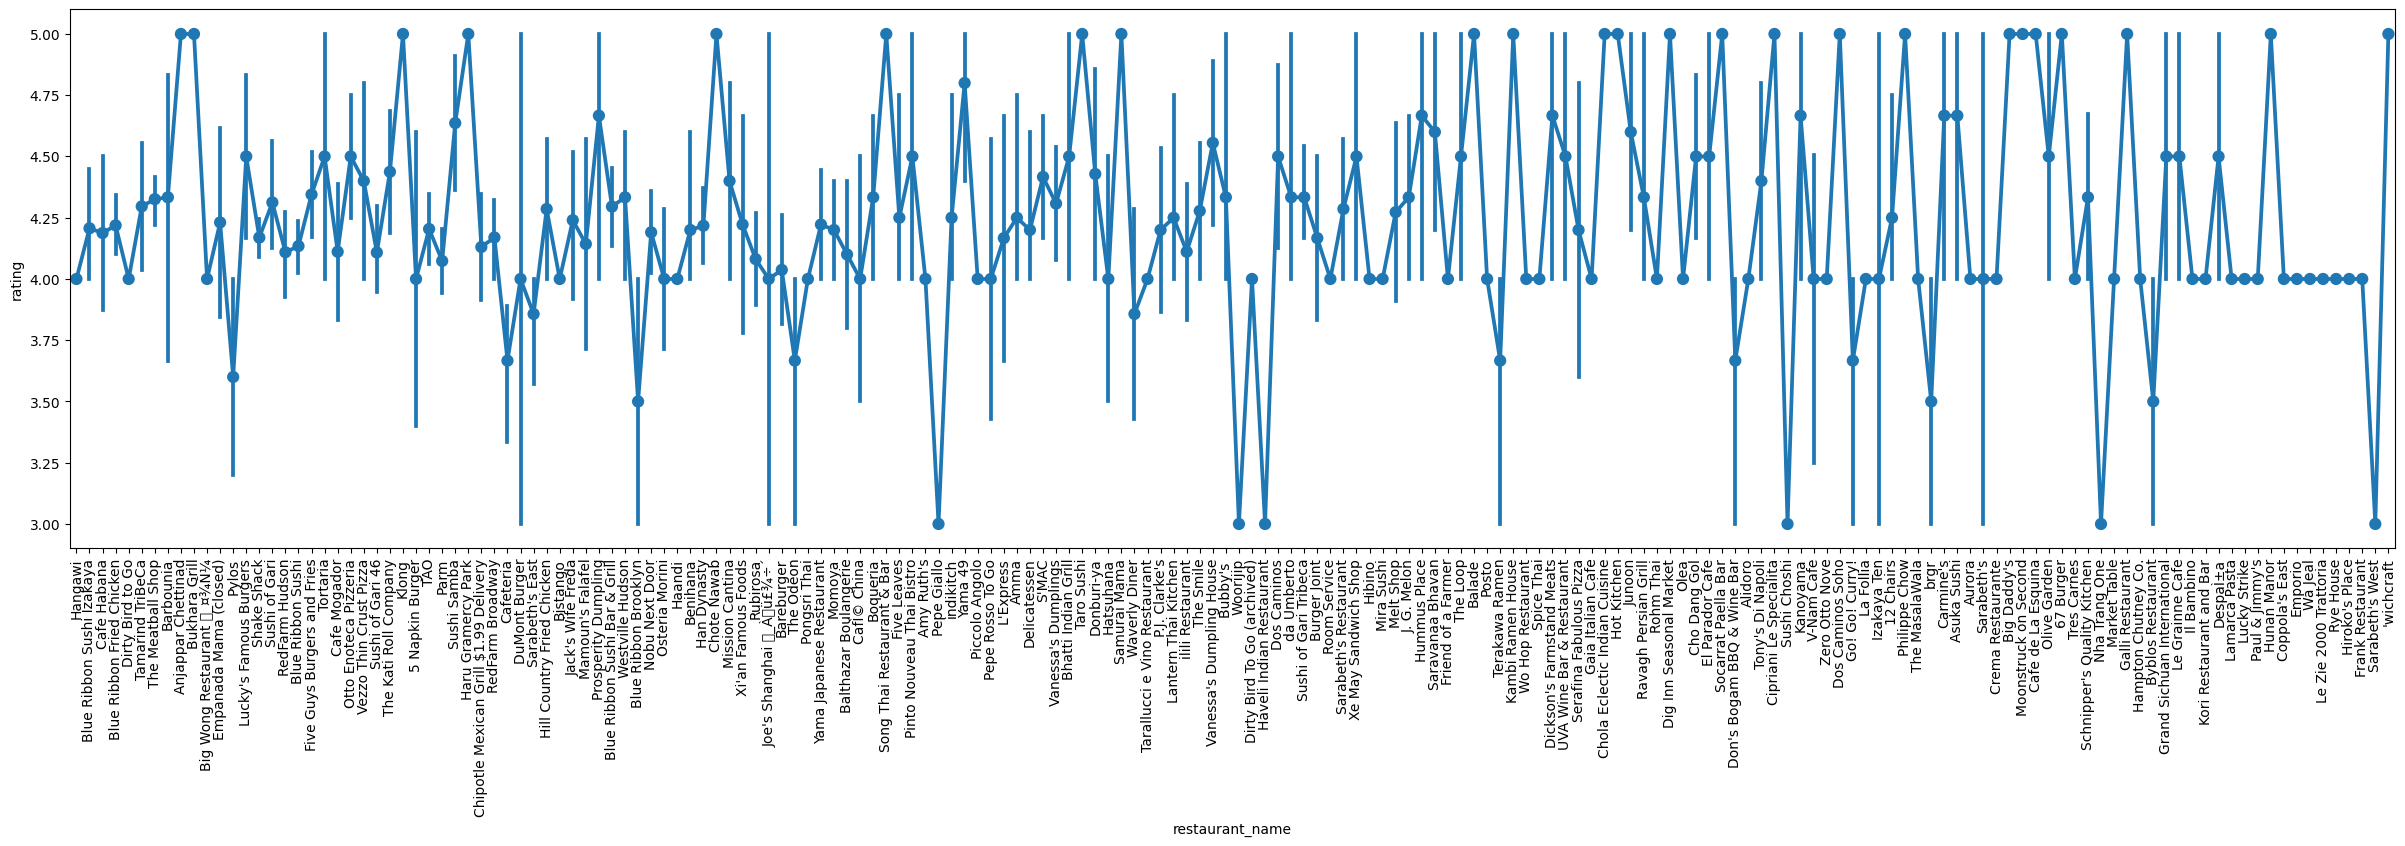

In [ ]:
plt.figure(figsize=(30,7))
sns.pointplot(data=df,x='restaurant_name',y='rating')
plt.xticks(rotation=90)

* The results are variable, but the rating is betwwen 3 and 5 for all restaurants

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '15'),
  Text(1, 0, '16'),
  Text(2, 0, '17'),
  Text(3, 0, '18'),
  Text(4, 0, '19'),
  Text(5, 0, '20'),
  Text(6, 0, '21'),
  Text(7, 0, '22'),
  Text(8, 0, '23'),
  Text(9, 0, '24'),
  Text(10, 0, '25'),
  Text(11, 0, '26'),
  Text(12, 0, '27'),
  Text(13, 0, '28'),
  Text(14, 0, '29'),
  Text(15, 0, '30'),
  Text(16, 0, '31'),
  Text(17, 0, '32'),
  Text(18, 0, '33')])

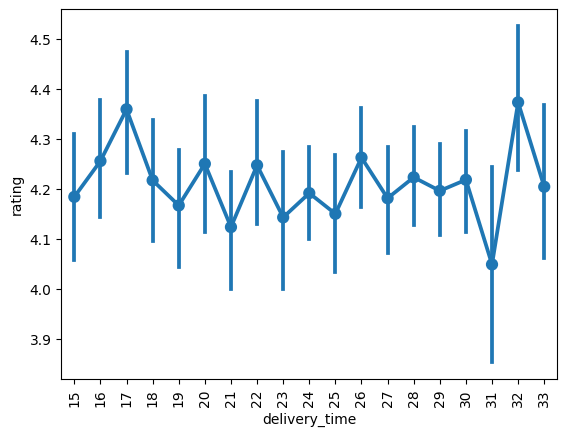

In [ ]:
sns.pointplot(data=df,x='delivery_time',y='rating')
plt.xticks(rotation=90)

* There is not a clear pattern. As mentiones previously the two columns are not correlated

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '15'),
  Text(1, 0, '16'),
  Text(2, 0, '17'),
  Text(3, 0, '18'),
  Text(4, 0, '19'),
  Text(5, 0, '20'),
  Text(6, 0, '21'),
  Text(7, 0, '22'),
  Text(8, 0, '23'),
  Text(9, 0, '24'),
  Text(10, 0, '25'),
  Text(11, 0, '26'),
  Text(12, 0, '27'),
  Text(13, 0, '28'),
  Text(14, 0, '29'),
  Text(15, 0, '30'),
  Text(16, 0, '31'),
  Text(17, 0, '32'),
  Text(18, 0, '33')])

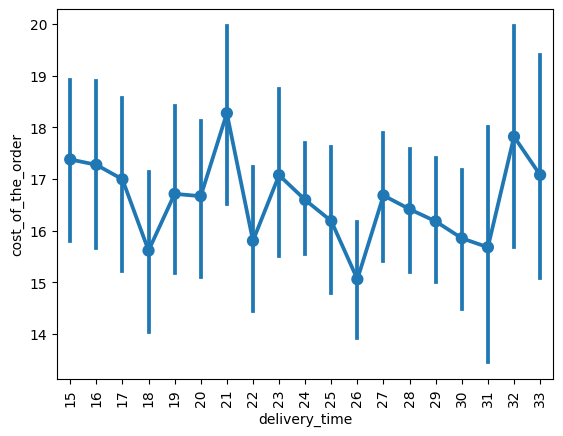

In [ ]:
sns.pointplot(data=df,x='delivery_time',y='cost_of_the_order')
plt.xticks(rotation=90)

* There is not a clear pattern. As mentiones previously the two columns are not correlated

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_2ratings = df
df_2ratings

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [ ]:
df2 = df_2ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df2

,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
...,...,...
173,Klong,1
174,Kambi Ramen House,1
175,Il Bambino,1
176,Hunan Manor,1


In [ ]:
df3 = df_2ratings.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
df3

,restaurant_name,rating
0,'wichcraft,5.0
1,Bukhara Grill,5.0
2,Cafe de La Esquina,5.0
3,Song Thai Restaurant & Bar,5.0
4,Socarrat Paella Bar,5.0
...,...,...
173,Pepe Giallo,3.0
174,Woorijip,3.0
175,Sushi Choshi,3.0
176,Haveli Indian Restaurant,3.0


In [ ]:
df4 = pd.merge(df2,df3,how='outer',on='restaurant_name')
df4

,restaurant_name,rating_x,rating_y
0,Shake Shack,219,4.168950
1,The Meatball Shop,132,4.325758
2,Blue Ribbon Sushi,119,4.134454
3,Blue Ribbon Fried Chicken,96,4.218750
4,Parm,68,4.073529
...,...,...,...
173,Klong,1,5.000000
174,Kambi Ramen House,1,5.000000
175,Il Bambino,1,4.000000
176,Hunan Manor,1,5.000000


In [ ]:
df4.loc[(df4['rating_x']>50) & (df4['rating_y']>4)]

,restaurant_name,rating_x,rating_y
0,Shake Shack,219,4.168950
1,The Meatball Shop,132,4.325758
2,Blue Ribbon Sushi,119,4.134454
3,Blue Ribbon Fried Chicken,96,4.218750
4,Parm,68,4.073529
5,RedFarm Broadway,59,4.169492
6,RedFarm Hudson,55,4.109091


#### Observations:
There are 6 restaurants that fulfill the conditions:
* Shake Shack, The meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm, RedFarm Broadway, and RedFarm Hudson


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
df_cost = df.groupby(['order_id'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()
df_cost

,order_id,cost_of_the_order
0,1477814,35.41
1,1477665,34.19
2,1477700,33.37
3,1476970,33.37
4,1478329,33.32
...,...,...
1893,1477786,4.75
1894,1477790,4.75
1895,1477788,4.71
1896,1476877,4.66


In [ ]:
def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df_cost ['revenue'] = df['cost_of_the_order'].apply(revenue)
df_cost

,order_id,cost_of_the_order,revenue
0,1477814,35.41,7.6875
1,1477665,34.19,1.8120
2,1477700,33.37,1.8345
3,1476970,33.37,7.3000
4,1478329,33.32,1.7385
...,...,...,...
1893,1477786,4.75,5.5775
1894,1477790,4.75,1.8270
1895,1477788,4.71,6.3050
1896,1476877,4.66,1.8270


In [ ]:
df_cost['revenue'].sum()

6166.303

#### Observations:
* The total revenue was 6166 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['delivery_time']+df['food_preparation_time']
df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


In [ ]:
df.loc[df['total_time']>60].shape[0]/df.shape[0]*100

10.537407797681771

#### Observations:
* The 10.53%  of the orders take more than 60 minutes to get delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df[df['day_of_the_week']=='Weekday']['delivery_time'].mean().astype(int)

28

In [ ]:
df[df['day_of_the_week']=='Weekend']['delivery_time'].mean().astype(int)

22

In [ ]:
fig = px.box(df, x="day_of_the_week", y="delivery_time", points="all")
fig.show()

#### Observations:
* The mean delivery time on weekdays is around 28 min.
* The mean delivery time on weekends is around 22 min.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

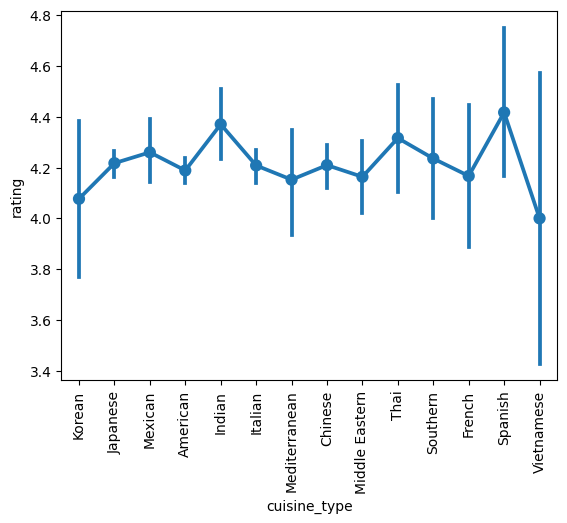

In [ ]:
sns.pointplot(data=df,x='cuisine_type',y='rating')
plt.xticks(rotation=90)

### Conclusions:
* American cuisine is the users' top choice, with the majority of restaurants specializing in this type of food.

* Spanish cuisine holds the highest ranking within our database.

* On average, orders cost $14.14, and food preparation takes approximately 27 minutes, while delivery averages 25 minutes.

* Currently, there are 178 registered restaurants in our database.

* The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

* * The most popular cuisines among users are American, Japanese, Italian, and Chinese.

* * The majority of orders are placed on weekends.

* Approximately 29% of orders exceed $20 in cost.

* There doesn't appear to be a clear correlation between order cost, food preparation time, and delivery time.

### Recommendations:

* The Client should intensify weekday marketing efforts to boost order numbers. The campaign should target American, Japanese, Italian, and Chinese cuisines, which are currently the most popular choices among customers.

* The Client should also consider allocating additional marketing resources to promote Spanish cuisine, as it has consistently ranked among the top choices in this category.

* There are five standout restaurants within the dataset where the Client can concentrate their marketing efforts. These establishments include Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.*
  
* An strategy can be to increase revenue percentages during the weekends when most of the order are placed.

* During the weekends the delivery time increase. The Client shall assign more delivery persons during the weekends.

---